In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.experimental.algorithms.mocmaes import MO_CMAES
from pymoo.factory import get_reference_directions
from pymoo.optimize import minimize
from pymoo.problems.multi import ZDT1, TNK
from pymoo.visualization.scatter import Scatter
from pysamoo.experimental.ParDen import ParDen

from sklearn.gaussian_process import GaussianProcessRegressor
gaussian_process = GaussianProcessRegressor()

problem = ZDT1(n_var=10)

ref_dirs = get_reference_directions("das-dennis", 2, n_points=20)

algorithm = NSGA2(pop_size=20, n_offsprings=10, ref_dirs=ref_dirs)

# algorithm = MO_CMAES(mu=20, sigma=0.1, lambda_=10)

algorithm = ParDen(algorithm,
                   n_initial_doe=20,
                   surrogate=gaussian_process, 
                   maxfill=True,
                   look_ahead=True)

res = minimize(
    problem,
    algorithm,
    ('n_evals', 250),
    seed=1,
    verbose=True)

n_gen |  n_eval |     igd      |      gd      |      hv      |     beta     |  nds_score   |   n_front   
    1 |      20 |  1.911750382 |  2.574224274 |  0.00000E+00 |           -1 |  0.392727935 |            5
    2 |      30 |  1.291787506 |  1.958253122 |  0.00000E+00 |           14 |  0.483102264 |            5
    3 |      40 |  1.210248479 |  1.798351187 |  0.00000E+00 |           19 |  0.484535021 |            6
    4 |      50 |  0.265371032 |  0.897373141 |  0.448206915 |           14 |  0.481160153 |            7
    5 |      60 |  0.146261096 |  0.198105207 |  0.465337526 |           12 |  0.570603118 |           10
    6 |      70 |  0.143005447 |  0.171677445 |  0.467360710 |            5 |  0.399467962 |           12
    7 |      80 |  0.143005447 |  0.110575289 |  0.467825547 |           12 |  0.376675669 |           10
    8 |      90 |  0.135179760 |  0.094074988 |  0.481205268 |           21 |  0.400856196 |           11
    9 |     100 |  0.099522956 |  0.077608262 

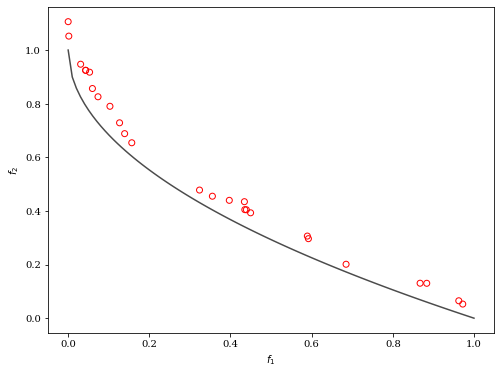

In [2]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

n_gen |  n_eval |     igd      |      gd      |      hv     
    1 |      50 |  1.526442823 |  2.253783461 |  0.00000E+00
    2 |      60 |  0.044255562 |  0.509850014 |  0.596930156
    3 |      70 |  0.031998513 |  0.294853515 |  0.614848681
    4 |      80 |  0.029032957 |  0.019217914 |  0.618074437
    5 |      90 |  0.024576580 |  0.015705981 |  0.628636592
    6 |     100 |  0.022079258 |  0.008619983 |  0.633400585
    7 |     110 |  0.018687600 |  0.013873803 |  0.637349721
    8 |     120 |  0.017164645 |  0.012377925 |  0.640430056
    9 |     130 |  0.015849330 |  0.011133903 |  0.643257900
   10 |     140 |  0.014689845 |  0.010267767 |  0.645026217
   11 |     150 |  0.014333874 |  0.008024180 |  0.645525469
   12 |     160 |  0.012908714 |  0.007798412 |  0.648409376
   13 |     170 |  0.012450672 |  0.006966210 |  0.649186270
   14 |     180 |  0.010962895 |  0.006307939 |  0.650829440
   15 |     190 |  0.010597767 |  0.006116912 |  0.651281005
   16 |     200 |  0.010

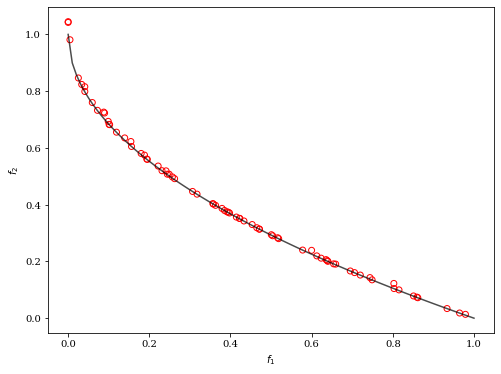

In [2]:
from pymoo.optimize import minimize
from pymoo.problems.multi.zdt import ZDT1
from pymoo.visualization.scatter import Scatter
from pysamoo.algorithms.ssansga2 import SSANSGA2

problem = ZDT1(n_var=10)

algorithm = SSANSGA2(n_initial_doe=20,
                     n_infills=10,
                     surr_pop_size=100,
                     surr_n_gen=50)

res = minimize(
    problem,
    algorithm,
    ('n_evals', 250),
    seed=1,
    verbose=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

n_gen |  n_eval |     igd      |      gd      |      hv      | n_influenced |    mae f1    |    mae f2   
    1 |      21 |  1.894282953 |  3.009591283 |  0.00000E+00 |            - |  3.29840E-16 |  0.164848978
    2 |      31 |  0.850469281 |  2.466037043 |  0.00000E+00 |         1/10 |  2.58231E-16 |  0.152440415
    3 |      41 |  0.500528296 |  0.324780792 |  0.199745061 |         4/10 |  2.18400E-16 |  0.118042986
    4 |      51 |  0.205374926 |  0.153341608 |  0.342974877 |         3/10 |  2.09272E-16 |  0.101486279
    5 |      61 |  0.179193247 |  0.169837417 |  0.389850852 |         2/10 |  2.04141E-16 |  0.079027479
    6 |      71 |  0.133319888 |  0.133941898 |  0.490888668 |         4/10 |  1.98041E-16 |  0.096714240
    7 |      81 |  0.120068781 |  0.108807099 |  0.508965722 |         5/10 |  2.15598E-16 |  0.082898593
    8 |      91 |  0.086742882 |  0.081720943 |  0.534839339 |         4/10 |  2.82281E-16 |  0.066307328
    9 |     101 |  0.060456447 |  0.047157543 

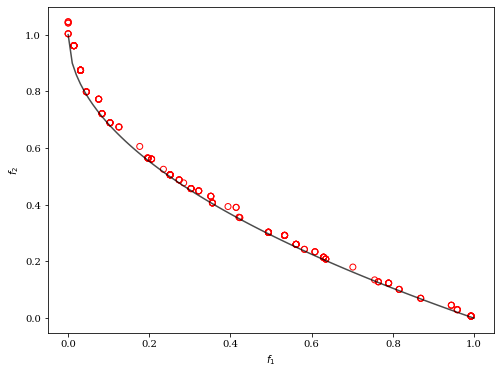

In [1]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.problems.multi import ZDT1
from pymoo.visualization.scatter import Scatter
from pysamoo.algorithms.gpsaf import GPSAF

problem = ZDT1(n_var=10)

algorithm = NSGA2(pop_size=20, n_offsprings=10)

algorithm = GPSAF(algorithm,
                  alpha=10,
                  beta=50,
                  n_max_doe=100,
                  n_max_infills=np.inf,
                  )

res = minimize(
    problem,
    algorithm,
    ('n_evals', 250),
    seed=1,
    verbose=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

n_gen |  n_eval |     igd      |      gd      |      hv      | n_influenced |    mae f1    |    mae f2   
    1 |      21 |  1.894282953 |  3.009591283 |  0.00000E+00 |            - |  3.29840E-16 |  0.164848978
    2 |      31 |  0.930453499 |  1.685852545 |  0.00000E+00 |         5/10 |  2.30198E-16 |  0.146849987
    3 |      41 |  0.572493992 |  0.427788066 |  0.119121296 |         2/10 |  2.10144E-16 |  0.114202947
    4 |      51 |  0.242158564 |  0.228310082 |  0.282224055 |         3/10 |  2.13440E-16 |  0.101634422
    5 |      61 |  0.231627038 |  0.303594168 |  0.301420530 |         3/10 |  1.79162E-16 |  0.082042714
    6 |      71 |  0.141726472 |  0.200965785 |  0.430085615 |         4/10 |  1.99007E-16 |  0.087955660
    7 |      81 |  0.088365785 |  0.150602128 |  0.508253896 |         5/10 |  2.24600E-16 |  0.097098879
    8 |      91 |  0.093954454 |  0.064623517 |  0.499740986 |         6/10 |  1.01289E-14 |  0.062376535
    9 |     101 |  0.065680673 |  0.041355412 

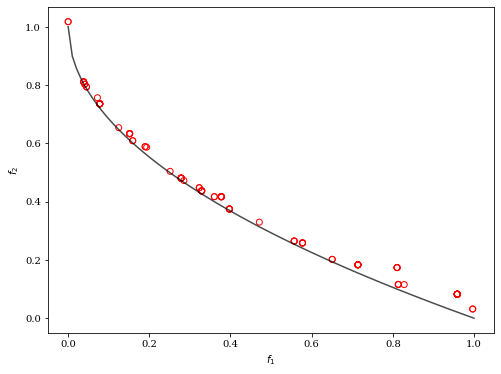

In [3]:
import numpy as np

from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.problems.multi import TNK
from pymoo.visualization.scatter import Scatter
from pysamoo.algorithms.gpsaf import GPSAF

problem = ZDT1(n_var=10)

ref_dirs = get_reference_directions("das-dennis", 2, n_points=20)

# create the algorithm object
algorithm = NSGA3(pop_size=20,
                  n_offsprings=10,
                  ref_dirs=ref_dirs)


algorithm = GPSAF(algorithm,
                  alpha=10,
                  beta=50,
                  n_max_doe=100,
                  )

res = minimize(
    problem,
    algorithm,
    ('n_evals', 200),
    seed=1,
    verbose=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()